$\huge \text{Q2:} \\ \text{Generate 2000 samples from a normal distribution with mean μ = p and standard deviation σ = p/2. Plot
the histogram.}$

In [1]:
# p values
p=14

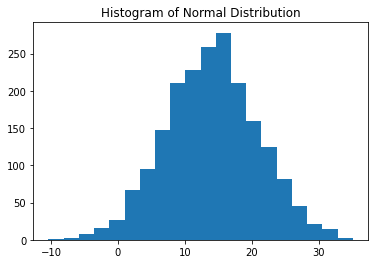

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(p, p/2, 2000)
plt.hist(x,bins=20)
plt.title('Histogram of Normal Distribution')
plt.show()

$ \huge \text{Q3.} \\ \text{We would like to find a distribution for σobserved using observed sample. For now, we will assume that μ = p is
known. Let θ = (μ, σ) and μ is} \\ \text{ known. For the prior, only assume that σ is positive. So, P(θ) = 1 if σ > 0 where
θ = (μ, σ). Create a python function prior(θ) which reflects that.} $

In [4]:
def Prior(theta):
  if theta[1] > 0: #theta[1] denotes the sigma
    return 1
  else:
    return 0

$ \huge \text{Q4.} \\ \text{For the Markov chain construction consider θ = (μ, σ) to be the states which is same as taking σ as the state.
The transition model is given by} \\Q(σ_{new}/σ_{current}) = N(σ_{current}, 1). \text{Create appropriate python function.}$

In [5]:
def Transition(theta):
  return [theta[0], np.random.normal(theta[1],1)]

$ \huge \text{Q5.} \\ \text{Explain why taking logarithms is helpful. Write a function in python that returns}  L(D/μ_{obs}, σ_a).  $ 

In [7]:
#Log likelihood function:
def Log_Likelihood(y, x):
  #x is data point and y is [mu_obs,sigma_a]
  return np.sum(-np.log(y[1] * np.sqrt(2* np.pi))-((x-y[0])**2) / (2*y[1]**2))

$\text{Taking logarithm is helpful because it reduces the complexity of function and converts the original likelihood function (which is product of many} \\ \text{ functions) into a sum of functions. Moreover logarithm is a monotonic increasing function , so it does not change the results obtained in analysis.}$

$ \huge \text{Q6.} \\ \text{Write a function acceptance} 
(θ_{current}, θ_{new}\text{) that
returns True or False according to whether the new sample is accepted or not.}$

In [9]:
def Acceptance(theta_current, theta_new):
  if theta_new > theta_current:
    return True
  else:
    accept = np.random.uniform(0,1)
    if accept < np.exp(theta_new - theta_current):
      return True
    else:
      return False

$ \huge \text{Q6.} \\ \text{Proceed similarly as you do in the generic Metropolis algorithm. Start with an initial state } θ_0 = (p, 0.1).\text{ Run
the MCMC for 50000 iterations} \\ \text{ and keep track of accepted and rejected σ values. Plot both accepted and rejected σ
values against iteration for the first 500 iterations. } \\ \text{ Then plot the same for all iterations. Explain your observations.}$

In [10]:
def Generic_Metropolis(Log, Prior, Trans, Initial_State, Iterations, D, Acceptance):
  y = Initial_State
  Accepted = []
  Rejected = []   
  Iter_Accepted = []
  Iter_Rejected = []
  for i in range(Iterations):
    y_new = Trans(y)
    y_lik = Log_Likelihood(y, x)
    y_new_lik = Log_Likelihood(y_new, x)
    if Acceptance(y_lik + np.log(Prior(y)), y_new_lik + np.log(Prior(y_new))) == True:            
      y = y_new
      Accepted.append(y_new)
      Iter_Accepted.append(i)
    else:
      Rejected.append(y_new)
      Iter_Rejected.append(i)  
  return np.array(Accepted), np.array(Rejected), np.array(Iter_Accepted), np.array(Iter_Rejected)

In [11]:
import warnings
warnings.filterwarnings('ignore')

For First 200 Iterations :


[]

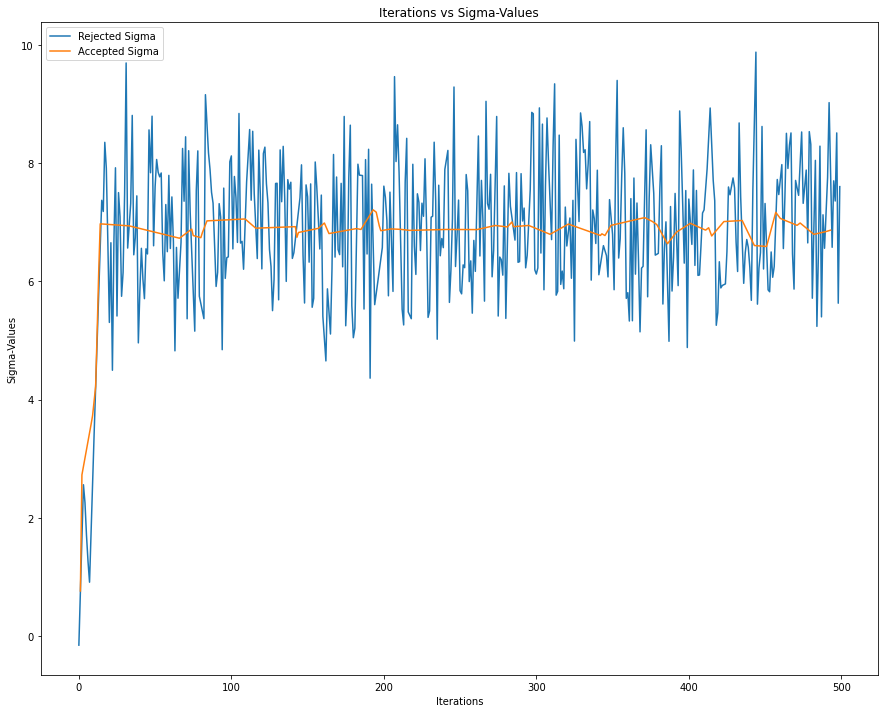

In [16]:
Accepted, Rejected, IterA, IterR = Generic_Metropolis(Log_Likelihood, Prior, Transition, [p,0.1], 500,x, Acceptance)
print('For First 200 Iterations :')
plt.figure(figsize=(15,12))
plt.plot(IterR, Rejected[:,1], label = r'Rejected Sigma')
plt.legend()
plt.plot(IterA, Accepted[:,1], label = r'Accepted Sigma')
plt.legend()
plt.title('Iterations vs Sigma-Values')
plt.xlabel('Iterations')
plt.ylabel('Sigma-Values')
plt.plot()

For 25000 Iterations :


[]

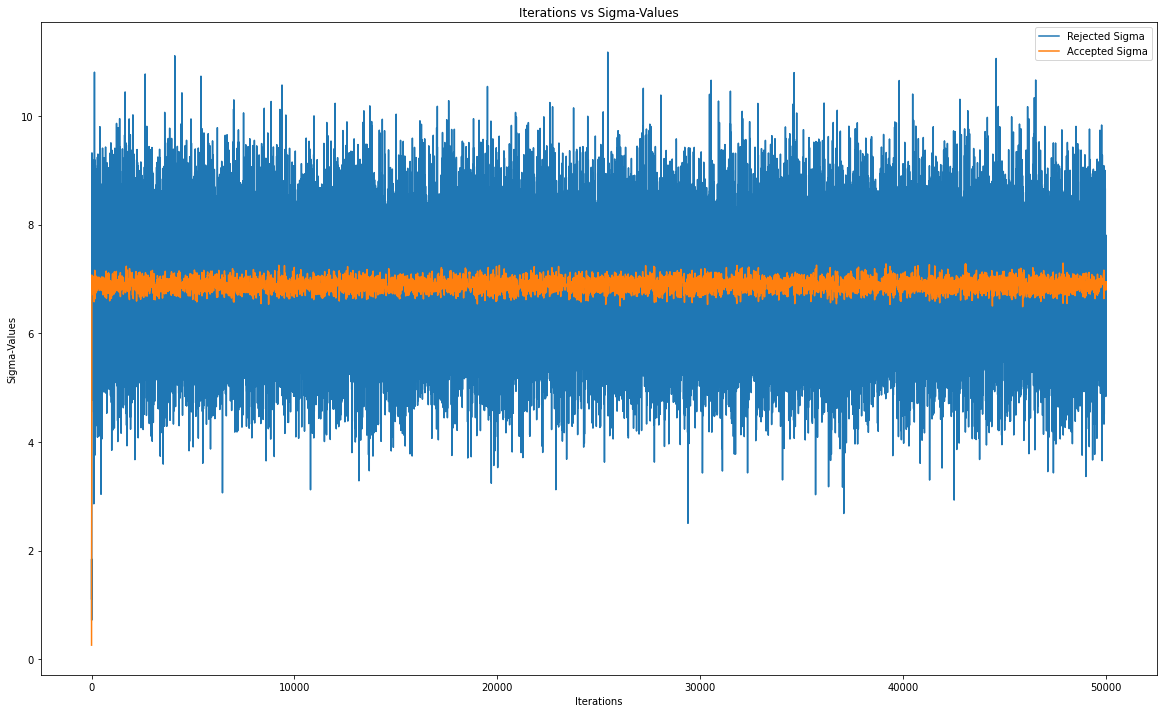

In [18]:
#For all iterations:
Accepted, Rejected, IterA, IterR = Generic_Metropolis(Log_Likelihood, Prior, Transition, [p,0.1], 50000, x, Acceptance)
print('For 25000 Iterations :')
plt.figure(figsize=(20,12))
plt.plot(IterR, Rejected[:,1], label = r'Rejected Sigma')
plt.legend()
plt.plot(IterA, Accepted[:,1], label = r'Accepted Sigma')
plt.legend()
plt.title('Iterations vs Sigma-Values')
plt.xlabel('Iterations')
plt.ylabel('Sigma-Values')
plt.plot()

$\text{We clearly saw that the  rejected region of Sigma values is oscillating very fastly about Sigma = 7 but accepted region is converging near} \\ \text{ Sigma = 7}$

$ \huge \text{Q6.} \\ \text{Discard the first 25% of the σ values which are accepted. Plot the histogram of the remaining σ values.
Explain your observations.} \\ \text{ Why dropping first few σ values makes sense?}$

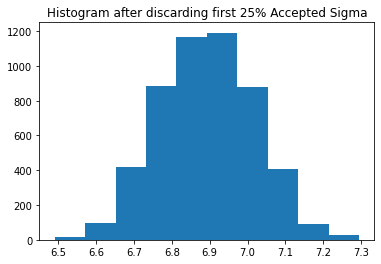

In [19]:
#Discarding the first 25% of the accepted sigma values.
New_Accepted = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
#Plotting histogram
plt.hist(New_Accepted)
plt.title('Histogram after discarding first 25% Accepted Sigma')
plt.show()

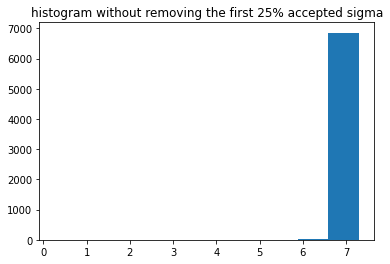

In [20]:
plt.hist(Accepted[:,1])
plt.title('histogram without removing the first 25% accepted sigma')
plt.show()

$ \text{From both the histograms, we can observe that if we don't discard the first 25% of accepted sigma values, we get a histogram from which we } \\ \text{can't conclude anything explicitly. but after discarding, we get a histogram which is normally distributed. this means that the metropolis} \\ \text{ algorithm initially tries to optimize the proper range for the accepted sigma.}$

$ \huge \text{Q6.} \\ \text{Now assume that μ and σ are both unknown. The same technique will be used to estimate μ and σ now. We
have to change the prior first.} \\ \text{ Assume that μ and σ are independent and μ is uniformly distributed between p/2 and
p+(p/2). P(θ) = P(μ)P(σ) with P(σ) as before.} \\ \text{ The state space is θ, and the transition probabilities are given by} \\ \text{
Q(θnew/θcurrent) = N(θcurrent, I), which is now a bivariate normal distribution. Make similar changes in other
quantities like } \\ \text{μa in place of μobs in the likelihood function,} θ_{new} = (μ_{new}, σ_{new}), θ_{current}.$

In [26]:
#For prior distribution:
def Prior(y):
  if y[1] > 0:
    if p/2 <= y[0] <= p+p/2:
      return 1/p
    else:
      return 0
  else:
    return 0
#For transition probabilities:
def Transition(y):
  return np.random.multivariate_normal(y, np.identity(2))

#Log likelihood function:
def Log_Likelihood(y, x):
  return np.sum(-np.log(y[1] * np.sqrt(2* np.pi))-((x-y[0])**2) / (2*y[1]**2))



In [27]:
def Generic_Metropolis(Log, Prior, Trans, Initial_State, Iterations, x, Acceptance):
  y = Initial_State
  Accepted = []
  Rejected = []
  Iter_Accepted = []
  Iter_Rejected = []
  for i in range(Iterations):
    y_new = Trans(y)
    y_lik = Log(y, x)
    y_new_lik = Log(y_new, x) 
    if Acceptance(y_lik + np.log(Prior(y)), y_new_lik + np.log(Prior(y_new))) == True:            
      y = y_new
      Accepted.append(y_new)
      Iter_Accepted.append(i)
    else:
      Rejected.append(y_new)
      Iter_Rejected.append(i)         
  return np.array(Accepted), np.array(Rejected), np.array(Iter_Accepted), np.array(Iter_Rejected)

$ \huge \text{Q6.} \\ \text{Start with initial value θ0 = (p/2, 0.1) and run the algorithm for some suitable iterates. After discarding
first 25% of accepcted θ, plot separate histogram for μ and σ.}$

For First 500 Iterations :


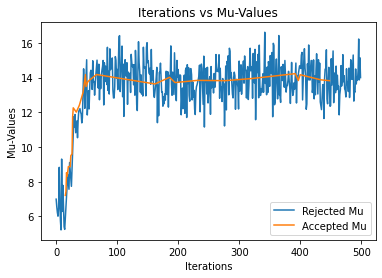

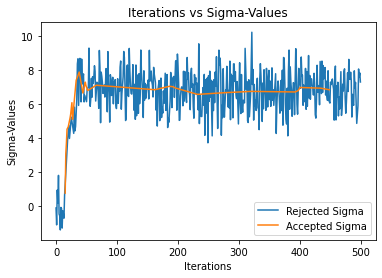

In [30]:
Accepted, Rejected, IterA, IterR = Generic_Metropolis(Log_Likelihood, Prior, Transition, [p/2,0.1], 500, x, Acceptance)
print('For First 500 Iterations :')
plt.plot(IterR, Rejected[:,0], label = r'Rejected Mu')
plt.legend()
plt.plot(IterA, Accepted[:,0], label = r'Accepted Mu')
plt.legend()
plt.title('Iterations vs Mu-Values')
plt.xlabel('Iterations')
plt.ylabel('Mu-Values')
plt.show()
plt.plot(IterR, Rejected[:,1], label = r'Rejected Sigma')
plt.legend()
plt.plot(IterA, Accepted[:,1], label = r'Accepted Sigma')
plt.legend()
plt.title('Iterations vs Sigma-Values')
plt.xlabel('Iterations')
plt.ylabel('Sigma-Values')
plt.show()

For 50000 Iterations :


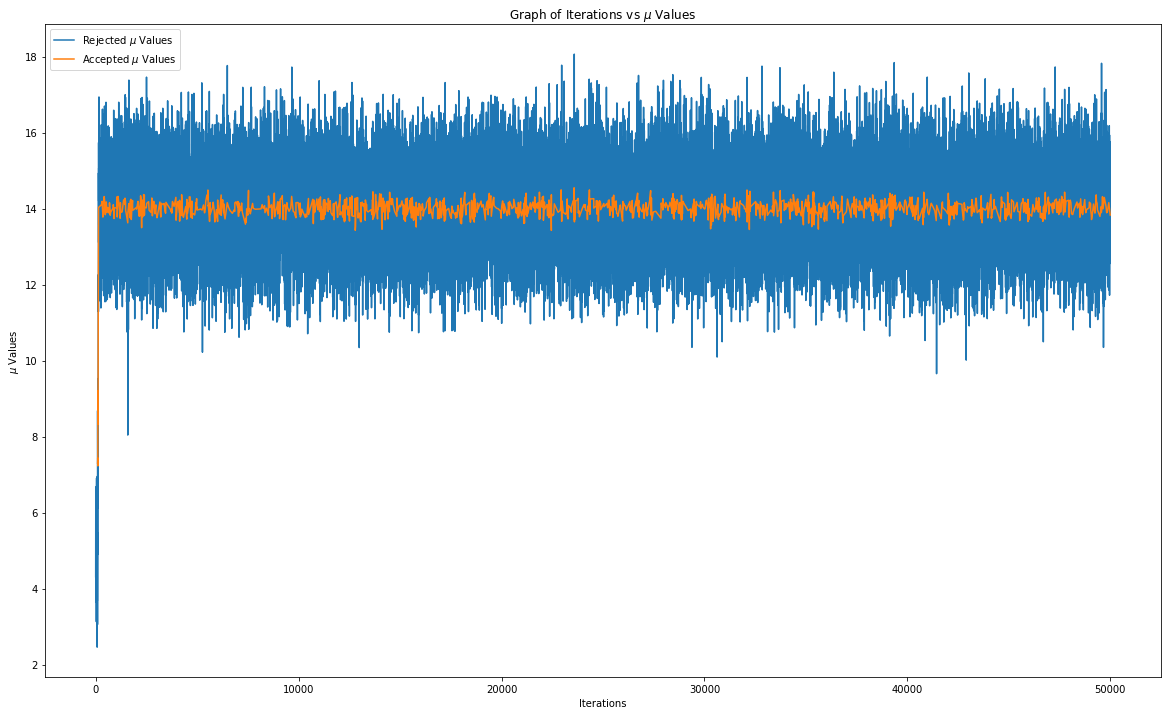

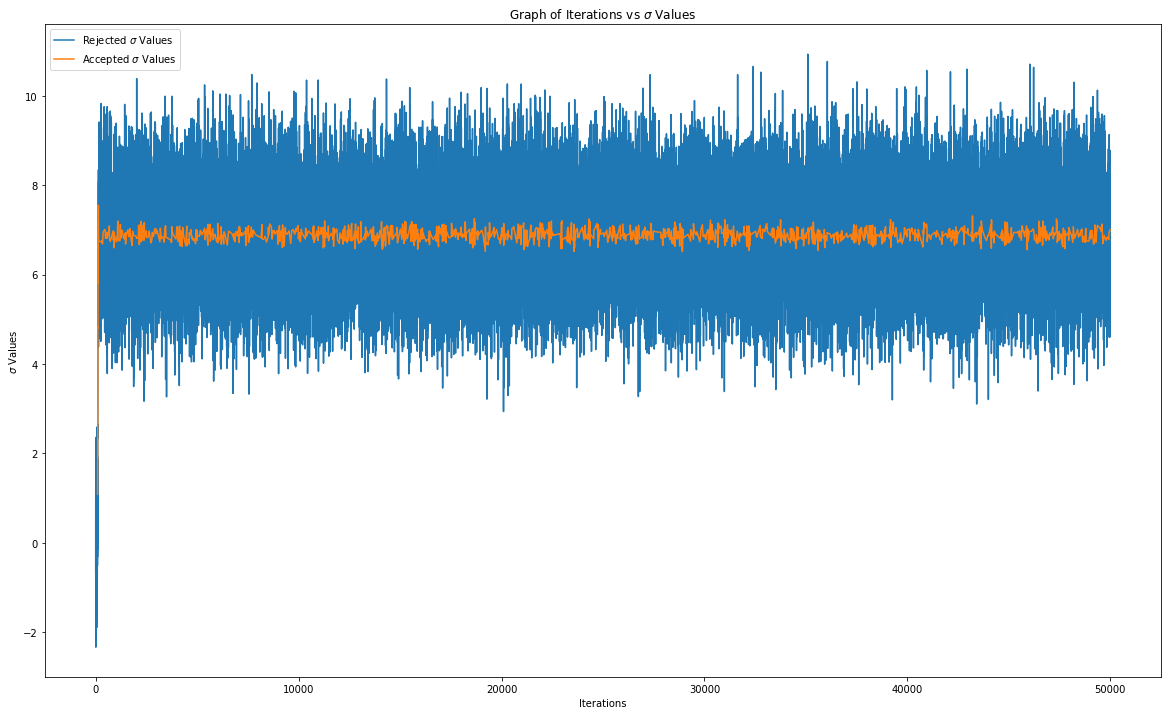

In [31]:
Accepted, Rejected, IterA, IterR = Generic_Metropolis(Log_Likelihood, Prior, Transition, [5,0.1], 50000, x, Acceptance)
print('For 50000 Iterations :')
plt.figure(figsize=(20,12))
plt.plot(IterR, Rejected[:,0], label = r'Rejected $\mu$ Values')
plt.legend()
plt.plot(IterA, Accepted[:,0], label = r'Accepted $\mu$ Values')
plt.legend()
plt.title(r'Graph of Iterations vs $\mu$ Values')
plt.xlabel('Iterations')
plt.ylabel(r'$\mu$ Values')
plt.show()
plt.figure(figsize=(20,12))
plt.plot(IterR, Rejected[:,1], label = r'Rejected $\sigma$ Values')
plt.legend()
plt.plot(IterA, Accepted[:,1], label = r'Accepted $\sigma$ Values')
plt.legend()
plt.title(r'Graph of Iterations vs $\sigma$ Values')
plt.xlabel('Iterations')
plt.ylabel(r'$\sigma$ Values')
plt.show()

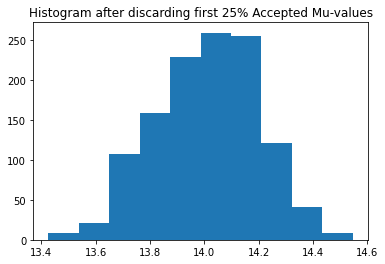

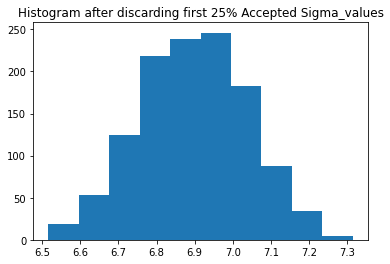

In [32]:
New_Accepted_mu = Accepted[:,0][int(0.25*len(Accepted[:,0]))::]
plt.hist(New_Accepted_mu)
plt.title('Histogram after discarding first 25% Accepted Mu-values')
plt.show()
New_Accepted_sigma = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.hist(New_Accepted_sigma)
plt.title('Histogram after discarding first 25% Accepted Sigma_values')
plt.show()